# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 11 Perceptron and ANN algorithms

Thursday Lab: 11/05/2020 3:15 pm - 4:30 pm

Friday Lab: 11/06/2020 9:25 am - 10:40 am

### Outline


1. Perceptron single layer class

2. built in multi later perceptron breast cancer data 

3. Visualize the weight matrix



### Introdiction  (15 minutes)

The objective of lab 10 is to familiarize you with the perceptron and ANN algorithms, I have provided some useful resources below that showcase the implementation of these from scratch by defining classes, I suggest you take a look and remind yourself what the constructor is and how we create a class in python. We will go through some code and identify these to ensure you remember.

Much of this code was recreted from~\cite{scikit-learn}\cite{pythonbook}

@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

@book{pythonbook,
 author = {VanderPlas, Jake},
 title = {Python Data Science Handbook: Essential Tools for Working with Data},
 year = {2016},
 isbn = {1491912057, 9781491912058},
 edition = {1st},
 publisher = {O'Reilly Media, Inc.},
} 


**These are excellent sources**

   [Perceptrton A](https://hackernoon.com/perceptron-deep-learning-basics-3a938c5f84b6)
   
   [Perceptron B](https://mllog.github.io/2016/11/04/Python-ML-Chapter-2/)
    
   [Peceptron Single layer](https://hackernoon.com/implementing-the-perceptron-algorithm-from-scratch-in-python-48be2d07b1c0)
    
   [NN-models](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
   
   [Large data](https://scikit-learn.org/stable/related_projects.html#related-projects)
   
   
The following bit of code is a simple single layer perceptron built from scratch. Lets take some time here to identify the constructor and methods within the created class also discuss how the weight matrix is being initialized and why is it the size it is.

```python
    #lets revisits classes a bit and create a class for the perceptron 
class Perceptron:
  #constructor, remember me?!
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predictor to predict on the data based on w, how do we know the size of w?
  
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
        Y.append(result)
    return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
      self.w = np.ones(X.shape[1])
      self.b = 0
      accuracy = {}
      max_accuracy = 0
      wt_matrix = []
    #for all epochs
    for i in range(epochs):
        for x, y in zip(X, Y):
            y_pred = self.model(x)
        if y == 1 and y_pred == 0:
            self.w = self.w + lr * x
            self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
            self.w = self.w - lr * x
            self.b = self.b + lr * 1
          
    wt_matrix.append(self.w)    
    accuracy[i] = accuracy_score(self.predict(X), Y)
    if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy)
    #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)
```
Make sure to discuss: the constructor, the dot product step, discuss how the weight vector is being updated, how does the model converge and why we have to define the number of time steps. 

In [1]:
# Here we make a class.

class Perceptron:
  #constructor, remember me?!
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predictor to predict on the data based on w, how do we know the size of w?
  
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
        Y.append(result)
    return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
      self.w = np.ones(X.shape[1])
      self.b = 0
      accuracy = {}
      max_accuracy = 0
      wt_matrix = []
    #for all epochs
    for i in range(epochs):
        for x, y in zip(X, Y):
            y_pred = self.model(x)
        if y == 1 and y_pred == 0:
            self.w = self.w + lr * x
            self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
            self.w = self.w - lr * x
            self.b = self.b + lr * 1
          
    wt_matrix.append(self.w)    
    accuracy[i] = accuracy_score(self.predict(X), Y)
    if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy)
    #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

## Task 1 (30 minutes): Use multi-later perceptron algorithm on the breast cancer data set with scikit-learn. 
 
We will use the breast cancer data set to build a classifier using the MLPClassifier. We will again take time to explore the data set and provide you with useful built in tools for data exploration.
 
```python
#import packages
import sklearn.datasets
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()
```

Spend some time here discussing data frames and what this figure represents we are going to use pandas for this and covert the data to data frames.

Discussion point: What is the advantage of a data frame in python?

```python
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()
```

This bit is important and make sure to discuss the feature imbalance and how this could potentially be an issue. 

We will use this for plotting a graph to see class imbalance any potential problems with this imbalance?

```python

data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

```

Min max feature scaling, discuss the importance with respect to the summed total and meeting a given threshold.

```python
from sklearn.preprocessing import MinMaxScaler
#perform min/max scaling on the data WHY is this important? Or what does this do? 
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

```

Train the model and make a prediction. Notice we did not use the default splitting.

```python
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values
#Create the model! 
from sklearn.neural_network import MLPClassifier
#Discuss in detail the hidden layers here ~5-10 minutes 
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlpc.fit(X_train, Y_train)
mlpc.predict(X_test)
```


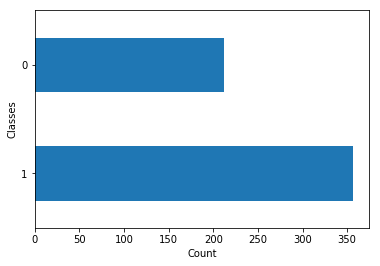

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [5]:
#Task 1

#import packages
import sklearn.datasets
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()

data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()


from sklearn.preprocessing import MinMaxScaler
#perform min/max scaling on the data WHY is this important? Or what does this do? 
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values

#Create the model! 

from sklearn.neural_network import MLPClassifier
#Discuss in detail the hidden layers here ~5-10 minutes 

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
mlpc.fit(X_train, Y_train)
mlpc.predict(X_test)

## Task 2 (30 minutes): Here we visualize the weights of a data set consisting of handwritten digits with 784 features. What should the shape of the first layer of the weight matrix have? Discuss in a small group for 5 minutes.

This code was recreated from~\cite{scikit-learn}

```python

    #First run this as is and dicuss the interesting results! What should we do to correct our results?
#Hint uncomment the code mlpc portion that is commented out. 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlpc = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlpc = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlpc.fit(X_train, y_train)
print("Training set score: %f" % mlpc.score(X_train, y_train))
print("Test set score: %f" % mlpc.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()
```


**Be prepared to discuss your results with the class.**

Iteration 1, loss = 1.79553386
Iteration 2, loss = 0.79905939
Iteration 3, loss = 0.52126492
Iteration 4, loss = 0.43222735
Iteration 5, loss = 0.38608924
Iteration 6, loss = 0.35658339
Iteration 7, loss = 0.33471438
Iteration 8, loss = 0.31753261
Iteration 9, loss = 0.30350187
Iteration 10, loss = 0.29130842
Iteration 11, loss = 0.28059339
Iteration 12, loss = 0.27134187
Iteration 13, loss = 0.26271124
Iteration 14, loss = 0.25495203
Iteration 15, loss = 0.24801162
Iteration 16, loss = 0.24138905
Iteration 17, loss = 0.23521261
Iteration 18, loss = 0.22928120
Iteration 19, loss = 0.22416062
Iteration 20, loss = 0.21883601
Iteration 21, loss = 0.21396655
Iteration 22, loss = 0.20935535
Iteration 23, loss = 0.20503099
Iteration 24, loss = 0.20075087
Iteration 25, loss = 0.19669048
Iteration 26, loss = 0.19286717
Iteration 27, loss = 0.18913726
Iteration 28, loss = 0.18553755
Iteration 29, loss = 0.18207779
Iteration 30, loss = 0.17857268
Iteration 31, loss = 0.17545813
Iteration 32, los

Iteration 253, loss = 0.02264553
Iteration 254, loss = 0.02241814
Iteration 255, loss = 0.02228570
Iteration 256, loss = 0.02213788
Iteration 257, loss = 0.02200133
Iteration 258, loss = 0.02179712
Iteration 259, loss = 0.02166381
Iteration 260, loss = 0.02156611
Iteration 261, loss = 0.02141718
Iteration 262, loss = 0.02125417
Iteration 263, loss = 0.02113348
Iteration 264, loss = 0.02094210
Iteration 265, loss = 0.02079812
Iteration 266, loss = 0.02071125
Iteration 267, loss = 0.02053263
Iteration 268, loss = 0.02037561
Iteration 269, loss = 0.02031469
Iteration 270, loss = 0.02010986
Iteration 271, loss = 0.02001195
Iteration 272, loss = 0.01984227
Iteration 273, loss = 0.01975813
Iteration 274, loss = 0.01960834
Iteration 275, loss = 0.01940550
Iteration 276, loss = 0.01932346
Iteration 277, loss = 0.01921292
Iteration 278, loss = 0.01907789
Iteration 279, loss = 0.01896549
Iteration 280, loss = 0.01881045
Iteration 281, loss = 0.01873840
Iteration 282, loss = 0.01855005
Iteration 

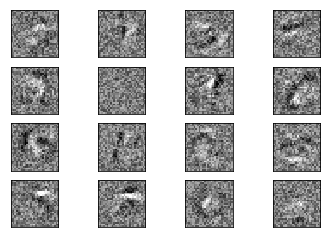

In [7]:
# Task 2

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlpc = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
#mlpc = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlpc.fit(X_train, y_train)
print("Training set score: %f" % mlpc.score(X_train, y_train))
print("Test set score: %f" % mlpc.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()